In [1]:
import ast
import astpretty
from astmonkey import visitors, transformers
from IPython.display import SVG, display
import os
import pandas as pd
import glob
import sys
sys.path.insert(1, "../")
from src.utils import input_dataset_path, graphs_path, file_with_changes_path

In [2]:
def show_tree(project, source, file_name, show=True):
    tree = ast.parse(source)
    node = transformers.ParentChildNodeTransformer().visit(tree)
    visitor = visitors.GraphNodeVisitor()
    visitor.visit(node)
    file_path = os.path.join(graphs_path(project), file_name)
    image_path = file_path + '.svg'
    str_path = file_path + '.txt'
    dot_path = file_path + '.dot'
    g = visitor.graph
    g.write_dot(dot_path)
    g.write_svg(image_path)
    str_with_tree = astpretty.pformat(tree)
    with open(str_path, 'w') as f:
        f.write(str_with_tree)
    if show:
        display(SVG(image_path))
        print(str_with_tree)
    return visitor

# Simple example of the AST tree

In [3]:
test_program = """
import os

x=5
y=0
# x=6
for i in range(x):
    y += i   
"""

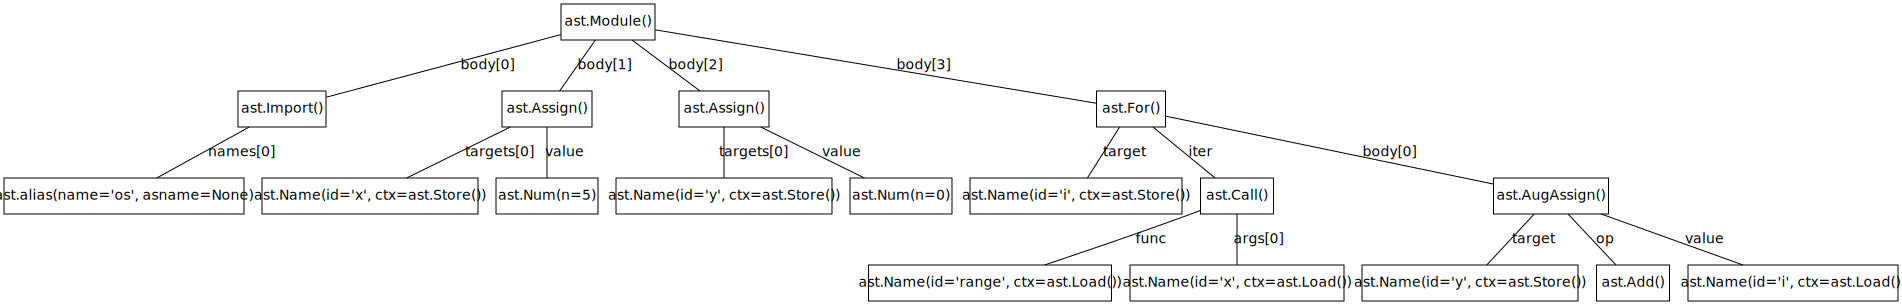

Module(
    body=[
        Import(
            lineno=2,
            col_offset=0,
            names=[alias(name='os', asname=None)],
        ),
        Assign(
            lineno=4,
            col_offset=0,
            targets=[Name(lineno=4, col_offset=0, id='x', ctx=Store())],
            value=Num(lineno=4, col_offset=2, n=5),
        ),
        Assign(
            lineno=5,
            col_offset=0,
            targets=[Name(lineno=5, col_offset=0, id='y', ctx=Store())],
            value=Num(lineno=5, col_offset=2, n=0),
        ),
        For(
            lineno=7,
            col_offset=0,
            target=Name(lineno=7, col_offset=4, id='i', ctx=Store()),
            iter=Call(
                lineno=7,
                col_offset=9,
                func=Name(lineno=7, col_offset=9, id='range', ctx=Load()),
                args=[Name(lineno=7, col_offset=15, id='x', ctx=Load())],
                keywords=[],
            ),
            body=[
                AugAssign(
      

In [4]:
v = show_tree('test', test_program, 'example')

# AST - grammar from: https://docs.python.org/3/library/ast.html

-- ASDL's 5 builtin types are:
-- identifier, int, string, object, constant

module Python
{
    mod = Module(stmt* body, type_ignore *type_ignores)
        | Interactive(stmt* body)
        | Expression(expr body)
        | FunctionType(expr* argtypes, expr returns)

        -- not really an actual node but useful in Jython's typesystem.
        | Suite(stmt* body)

    stmt = FunctionDef(identifier name, arguments args,
                       stmt* body, expr* decorator_list, expr? returns,
                       string? type_comment)
          | AsyncFunctionDef(identifier name, arguments args,
                             stmt* body, expr* decorator_list, expr? returns,
                             string? type_comment)

          | ClassDef(identifier name,
             expr* bases,
             keyword* keywords,
             stmt* body,
             expr* decorator_list)
          | Return(expr? value)

          | Delete(expr* targets)
          | Assign(expr* targets, expr value, string? type_comment)
          | AugAssign(expr target, operator op, expr value)
          -- 'simple' indicates that we annotate simple name without parens
          | AnnAssign(expr target, expr annotation, expr? value, int simple)

          -- use 'orelse' because else is a keyword in target languages
          | For(expr target, expr iter, stmt* body, stmt* orelse, string? type_comment)
          | AsyncFor(expr target, expr iter, stmt* body, stmt* orelse, string? type_comment)
          | While(expr test, stmt* body, stmt* orelse)
          | If(expr test, stmt* body, stmt* orelse)
          | With(withitem* items, stmt* body, string? type_comment)
          | AsyncWith(withitem* items, stmt* body, string? type_comment)

          | Raise(expr? exc, expr? cause)
          | Try(stmt* body, excepthandler* handlers, stmt* orelse, stmt* finalbody)
          | Assert(expr test, expr? msg)

          | Import(alias* names)
          | ImportFrom(identifier? module, alias* names, int? level)

          | Global(identifier* names)
          | Nonlocal(identifier* names)
          | Expr(expr value)
          | Pass | Break | Continue

          -- XXX Jython will be different
          -- col_offset is the byte offset in the utf8 string the parser uses
          attributes (int lineno, int col_offset, int? end_lineno, int? end_col_offset)

          -- BoolOp() can use left & right?
    expr = BoolOp(boolop op, expr* values)
         | NamedExpr(expr target, expr value)
         | BinOp(expr left, operator op, expr right)
         | UnaryOp(unaryop op, expr operand)
         | Lambda(arguments args, expr body)
         | IfExp(expr test, expr body, expr orelse)
         | Dict(expr* keys, expr* values)
         | Set(expr* elts)
         | ListComp(expr elt, comprehension* generators)
         | SetComp(expr elt, comprehension* generators)
         | DictComp(expr key, expr value, comprehension* generators)
         | GeneratorExp(expr elt, comprehension* generators)
         -- the grammar constrains where yield expressions can occur
         | Await(expr value)
         | Yield(expr? value)
         | YieldFrom(expr value)
         -- need sequences for compare to distinguish between
         -- x < 4 < 3 and (x < 4) < 3
         | Compare(expr left, cmpop* ops, expr* comparators)
         | Call(expr func, expr* args, keyword* keywords)
         | FormattedValue(expr value, int? conversion, expr? format_spec)
         | JoinedStr(expr* values)
         | Constant(constant value, string? kind)

         -- the following expression can appear in assignment context
         | Attribute(expr value, identifier attr, expr_context ctx)
         | Subscript(expr value, slice slice, expr_context ctx)
         | Starred(expr value, expr_context ctx)
         | Name(identifier id, expr_context ctx)
         | List(expr* elts, expr_context ctx)
         | Tuple(expr* elts, expr_context ctx)

          -- col_offset is the byte offset in the utf8 string the parser uses
          attributes (int lineno, int col_offset, int? end_lineno, int? end_col_offset)

    expr_context = Load | Store | Del | AugLoad | AugStore | Param

    slice = Slice(expr? lower, expr? upper, expr? step)
          | ExtSlice(slice* dims)
          | Index(expr value)

    boolop = And | Or

    operator = Add | Sub | Mult | MatMult | Div | Mod | Pow | LShift
                 | RShift | BitOr | BitXor | BitAnd | FloorDiv

    unaryop = Invert | Not | UAdd | USub

    cmpop = Eq | NotEq | Lt | LtE | Gt | GtE | Is | IsNot | In | NotIn

    comprehension = (expr target, expr iter, expr* ifs, int is_async)

    excepthandler = ExceptHandler(expr? type, identifier? name, stmt* body)
                    attributes (int lineno, int col_offset, int? end_lineno, int? end_col_offset)

    arguments = (arg* posonlyargs, arg* args, arg? vararg, arg* kwonlyargs,
                 expr* kw_defaults, arg? kwarg, expr* defaults)

    arg = (identifier arg, expr? annotation, string? type_comment)
           attributes (int lineno, int col_offset, int? end_lineno, int? end_col_offset)

    -- keyword arguments supplied to call (NULL identifier for **kwargs)
    keyword = (identifier? arg, expr value)

    -- import name with optional 'as' alias.
    alias = (identifier name, identifier? asname)

    withitem = (expr context_expr, expr? optional_vars)

    type_ignore = TypeIgnore(int lineno, string tag)
}

# Example from real data

In [5]:
project = 'openstack'

## One random file

In [6]:
def graph_file_name(path):
    file_name = os.path.split(path)[1]
    before_or_after = os.path.split(os.path.split(path)[0])[1]
    return before_or_after + "_" + file_name

In [7]:
file = os.path.join(file_with_changes_path(project), '0a0d5f426e584c6a6047ce809dfd5d9985417b59/after/nova_api_ec2_cloud.py')

In [8]:
v = show_tree(project, open(file, "r").read(), graph_file_name(file), False)

## Commit introducing error according to the data 
I've selected the commit with the smallest number of lines to look at.

Files are saved in the data/graphs directories in the project. 

There are separate files for state before and after.

The commit can be found on Github: https://github.com/openstack/neutron/commit/1dabc0629e642aab6076fc0ca4e7f9698341a797


In [9]:
df = pd.read_csv(input_dataset_path(project))

In [10]:
df['lines_mod'] = df.la + df.ld
df_bugs = df.query("buggy == True").sort_values(by='lines_mod').copy()
df_bugs.head()

,Unnamed: 0,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,...,osexp,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata,lines_mod
9416,20376,c19e187108823f01f7e93f227e43886303c869c0,1359068536,1,0,1,0,1,1,1,...,1188.0,0.089943,0.258654,0.324067,1,True,False,1.0,2,1
9329,20163,bfa9d88f432f20cf4a4d85a4050e4f94dc874457,1360162677,1,0,1,0,1,1,1,...,654.0,0.680115,0.943804,0.943804,1,True,False,1.0,2,1
423,901,0916370a486419b9606331d972666f1551d499d9,1392150864,1,0,1,0,1,1,1,...,558.0,0.395892,0.395892,0.395892,1,True,False,1.0,4,1
11060,23931,e38e0580ed91cbb41683ca5386bc65ccbc1999c2,1358448157,1,0,1,0,1,1,1,...,478.0,0.057508,0.744409,0.765176,1,True,False,1.0,2,1
7057,15102,8eb7ca51c0bfda334eda8a25d599aa1d9cd21c22,1349431633,1,0,1,0,1,1,1,...,320.0,0.625000,0.627717,0.872283,1,True,False,1.0,1,1


In [13]:
def count_lines_to_analyse(commit_id):
    files = glob.glob(os.path.join(file_with_changes_path(project), f'{commit_id}/*/*'))
    cnt = sum(1 for line in open(file) for file in files)
    return cnt

In [14]:
df_bugs['lines_to_analyse'] = df_bugs.commit_id.apply(count_lines_to_analyse)
df_bugs['lines_to_analyse'].describe()

count      1616.000000
mean      27604.977723
std       41168.941845
min        3868.000000
25%        7736.000000
50%       15472.000000
75%       30944.000000
max      901244.000000
Name: lines_to_analyse, dtype: float64

In [15]:
df_bugs.sort_values(by='lines_to_analyse').head()

,Unnamed: 0,commit_id,author_date,bugcount,fixcount,la,ld,nf,nd,ns,...,asawr,rsawr,osawr,churn,buggy,fix,bugdens,strata,lines_mod,lines_to_analyse
9416,20376,c19e187108823f01f7e93f227e43886303c869c0,1359068536,1,0,1,0,1,1,1,...,0.089943,0.258654,0.324067,1,True,False,1.000000,2,1,3868
11357,24643,ea711b229789d9db54b7e10fe4c67ee1bf1db8c6,1340991052,1,0,11,4,1,1,1,...,0.006780,0.319209,0.321469,15,True,False,0.066667,1,15,3868
2013,4232,28a6ef007e2faa47fd4ad0d855098945eacf2317,1363012374,1,0,44,41,1,1,1,...,0.185410,0.286718,0.428502,85,True,False,0.011765,2,85,3868
2467,5195,31946ebb5d7748fada269bd867f0e6d6e02ef736,1366748597,1,0,11,5,1,1,1,...,0.785872,0.863135,0.863135,16,True,False,0.062500,2,16,3868
1428,3043,1dabc0629e642aab6076fc0ca4e7f9698341a797,1378852696,1,0,9,8,1,1,1,...,0.353896,0.363636,0.610390,17,True,False,0.058824,3,17,3868


In [19]:
selected_commit_id = '1dabc0629e642aab6076fc0ca4e7f9698341a797'

In [22]:
for f in files:
    show_tree(project, open(f, "r").read(), graph_file_name(f), False)